## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Problem 1:
<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> A research laboratory was developing a new compound for the relief of severe cases of hay fever. In an experiment with 36 volunteers, the amounts of the two active ingredients (A & B) in the compound were varied at three levels each. Randomization was used in assigning four volunteers to each of the nine treatments. The data on hours of relief can be found in the following .csv file: Fever.csv
<a id='measures'></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)
from statsmodels.formula.api import ols     
from statsmodels.stats.anova import _get_covariance,anova_lm 
%matplotlib inline
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

In [2]:
fever = pd.read_csv('Fever-1.csv')

#### <span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> ASSUMPTIONS OF ANOVA (assumed to be satisfied):
<font color=darkblue> 
1. The samples drawn from different populations are independent & random
2. The response variables of the population are continuous & normally distributed
3. The variances of the population are equal (approximately) 

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> 1.1 State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually. [both statement and statistical form like Ho=mu, Ha>mu]

#### <font color=darkblue> Hypothesis for A: 
<font color=darkblue> 
Null: the mean hours of relief for the different levels of component A are equal
    
<font color=darkblue> 
Alt: the mean hours of relief for at least one of the levels of component A is (are) not equal

<font color=darkblue> 
Alternatively,
    
<font color=darkblue> 
Null: µ1 = µ2 = µ3
    
<font color=darkblue> 
Alt: at least one µ j's is (are) not equal
    
<font color=darkblue> 
#### Hypothesis for B: 
Null: the mean hours of relief for the different levels of component B are equal
    
<font color=darkblue> 
Alt: the mean hours of relief for at least one of the levels of component B is (are) not equal

<font color=darkblue> 
Alternatively,   
    
<font color=darkblue> 
Null: µ1 = µ2 = µ3
    
<font color=darkblue> 
Alt: at least one µ j's is (are) not equal

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> 1.2 Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results

In [3]:
formula_1 = 'Relief ~ C(A)'
model_1 = ols(formula_1, fever).fit()
aov_table_1 = anova_lm(model_1)
print(aov_table_1)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


##### <font color=darkblue> Here, p-Value=0.00000045 < α=0.05, so we reject null and conclude that mean hours of relief for at least one of the levels of component A is (are) not equal

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> 1.3 Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [4]:
formula_2 = 'Relief ~ C(B)'
model_2 = ols(formula_2, fever).fit()
aov_table_2 = anova_lm(model_2)
print(aov_table_2)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


##### <font color=darkblue> Here, p-Value=0.0014 < α=0.05, so we reject null and conclude that mean hours of relief for at least one of the levels of component B is (are) not equal

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> 1.4 Analyse the effects of one variable on another with the help of an interaction plot.

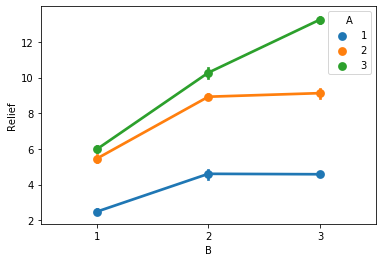

In [5]:
A_on_B = sns.pointplot(fever['B'],fever['Relief'],fever['A'])

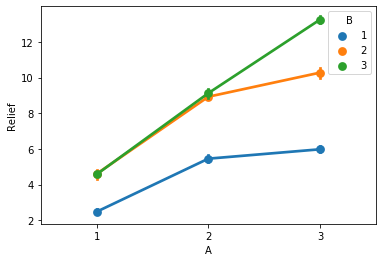

In [6]:
A_on_B_1 = sns.pointplot(fever['A'],fever['Relief'],fever['B'])

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> 1.5 Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’ along with their interaction 'A*B') with the variable 'Relief' and state your results.

In [7]:
model_3 = ols('Relief ~ C(A) + C(B) + C(A):C(B)',data=fever).fit()
aov_table_3 = anova_lm(model_3)
print(aov_table_3)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> 1.6 Mention the business implications of performing ANOVA for this particular case study.

<font color=darkblue> 
ANOVA allows for the comparison of the relief based on the two independent variables, which in this case is the two active ingredients, A & B (which varies at three different levels).

<font color=darkblue>
By observing the comparison between the dependent and independent variables which is ‘Relief’ and ‘A’, ‘B’ respectively in this case, the researchers can vary the levels of ‘A’ &/or ‘B’ whichever best treats the hay fever and produce the effective drug in the market.
   
    
<font color=darkblue>
** Note:
That particular brand of drug might perform well in terms of generating larger number of customers, and ultimately increasing the market share.


## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Problem 2:
<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> The dataset Education - Post 12th Standard.csv is a dataset that contains the names of various colleges. This particular case study is based on various parameters of various institutions. You are expected to do Principal Component Analysis for this case study according to the instructions given in the following rubric. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.


In [8]:
educ = pd.read_csv('Education - Post 12th Standard-1.csv')

In [9]:
educ.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [10]:
educ.shape

(777, 18)

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> 2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

In [11]:
educ_1 = educ.drop('Names',axis=1)

In [12]:
educ_1.shape

(777, 17)

In [13]:
educ_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    int64  
 1   Accept       777 non-null    int64  
 2   Enroll       777 non-null    int64  
 3   Top10perc    777 non-null    int64  
 4   Top25perc    777 non-null    int64  
 5   F.Undergrad  777 non-null    int64  
 6   P.Undergrad  777 non-null    int64  
 7   Outstate     777 non-null    int64  
 8   Room.Board   777 non-null    int64  
 9   Books        777 non-null    int64  
 10  Personal     777 non-null    int64  
 11  PhD          777 non-null    int64  
 12  Terminal     777 non-null    int64  
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    int64  
 15  Expend       777 non-null    int64  
 16  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16)
memory usage: 103.3 KB


#### For Univariate Analysis- We can see Mean, IQR, Median, Skewness, Standard Deviation

In [14]:
educ_1.mean()

Apps            3001.638353
Accept          2018.804376
Enroll           779.972973
Top10perc         27.558559
Top25perc         55.796654
F.Undergrad     3699.907336
P.Undergrad      855.298584
Outstate       10440.669241
Room.Board      4357.526384
Books            549.380952
Personal        1340.642214
PhD               72.660232
Terminal          79.702703
S.F.Ratio         14.089704
perc.alumni       22.743887
Expend          9660.171171
Grad.Rate         65.463320
dtype: float64

In [15]:
educ_1.median()

Apps           1558.0
Accept         1110.0
Enroll          434.0
Top10perc        23.0
Top25perc        54.0
F.Undergrad    1707.0
P.Undergrad     353.0
Outstate       9990.0
Room.Board     4200.0
Books           500.0
Personal       1200.0
PhD              75.0
Terminal         82.0
S.F.Ratio        13.6
perc.alumni      21.0
Expend         8377.0
Grad.Rate        65.0
dtype: float64

In [16]:
#IQR
educ_1.quantile(0.75) - educ_1.quantile(0.25) 

Apps           2848.0
Accept         1820.0
Enroll          660.0
Top10perc        20.0
Top25perc        28.0
F.Undergrad    3013.0
P.Undergrad     872.0
Outstate       5605.0
Room.Board     1453.0
Books           130.0
Personal        850.0
PhD              23.0
Terminal         21.0
S.F.Ratio         5.0
perc.alumni      18.0
Expend         4079.0
Grad.Rate        25.0
dtype: float64

In [17]:
educ_1.std()

Apps           3870.201484
Accept         2451.113971
Enroll          929.176190
Top10perc        17.640364
Top25perc        19.804778
F.Undergrad    4850.420531
P.Undergrad    1522.431887
Outstate       4023.016484
Room.Board     1096.696416
Books           165.105360
Personal        677.071454
PhD              16.328155
Terminal         14.722359
S.F.Ratio         3.958349
perc.alumni      12.391801
Expend         5221.768440
Grad.Rate        17.177710
dtype: float64

In [18]:
educ_1.skew()

Apps           3.723750
Accept         3.417727
Enroll         2.690465
Top10perc      1.413217
Top25perc      0.259340
F.Undergrad    2.610458
P.Undergrad    5.692353
Outstate       0.509278
Room.Board     0.477356
Books          3.485025
Personal       1.742497
PhD           -0.768170
Terminal      -0.816542
S.F.Ratio      0.667435
perc.alumni    0.606891
Expend         3.459322
Grad.Rate     -0.113777
dtype: float64

#### Histogram

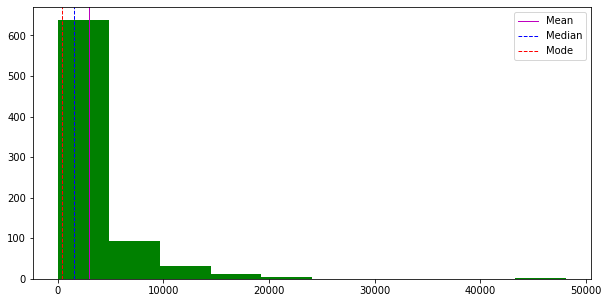

In [19]:
plt.figure(figsize=(10,5)) # makes the plot wider
plt.hist(educ['Apps'], color='g') # plots a simple histogram
plt.axvline(educ['Apps'].mean(), color='m', linewidth=1,label='Mean')
plt.axvline(educ['Apps'].median(), color='b', linestyle='dashed', linewidth=1,label='Median')
plt.axvline(educ['Apps'].mode()[0], color='r', linestyle='dashed', linewidth=1,label='Mode')
plt.legend()

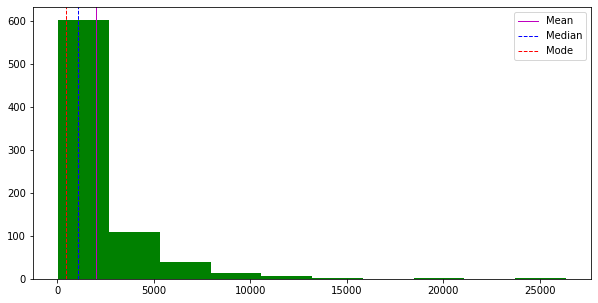

In [20]:
plt.figure(figsize=(10,5)) # makes the plot wider
plt.hist(educ['Accept'], color='g') # plots a simple histogram
plt.axvline(educ['Accept'].mean(), color='m', linewidth=1,label='Mean')
plt.axvline(educ['Accept'].median(), color='b', linestyle='dashed', linewidth=1,label='Median')
plt.axvline(educ['Accept'].mode()[0], color='r', linestyle='dashed', linewidth=1,label='Mode')
plt.legend()

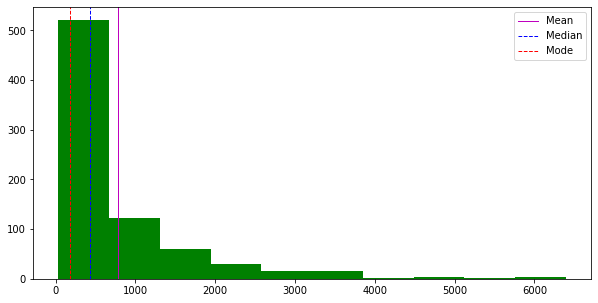

In [21]:
plt.figure(figsize=(10,5)) # makes the plot wider
plt.hist(educ['Enroll'], color='g') # plots a simple histogram
plt.axvline(educ['Enroll'].mean(), color='m', linewidth=1,label='Mean')
plt.axvline(educ['Enroll'].median(), color='b', linestyle='dashed', linewidth=1,label='Median')
plt.axvline(educ['Enroll'].mode()[0], color='r', linestyle='dashed', linewidth=1,label='Mode')
plt.legend()

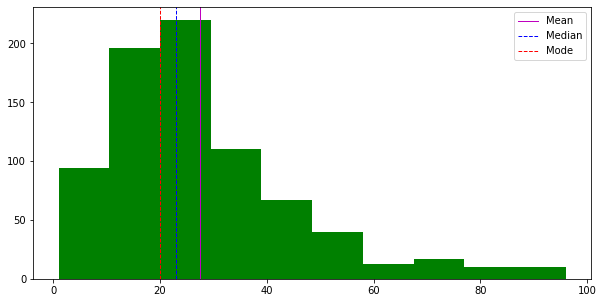

In [22]:
plt.figure(figsize=(10,5)) # makes the plot wider
plt.hist(educ['Top10perc'], color='g') # plots a simple histogram
plt.axvline(educ['Top10perc'].mean(), color='m', linewidth=1,label='Mean')
plt.axvline(educ['Top10perc'].median(), color='b', linestyle='dashed', linewidth=1,label='Median')
plt.axvline(educ['Top10perc'].mode()[0], color='r', linestyle='dashed', linewidth=1,label='Mode')
plt.legend()

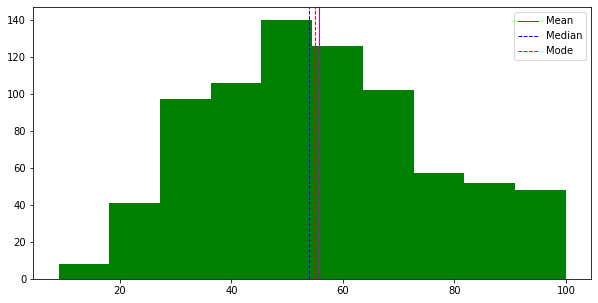

In [23]:
plt.figure(figsize=(10,5)) # makes the plot wider
plt.hist(educ['Top25perc'], color='g') # plots a simple histogram
plt.axvline(educ['Top25perc'].mean(), color='m', linewidth=1,label='Mean')
plt.axvline(educ['Top25perc'].median(), color='b', linestyle='dashed', linewidth=1,label='Median')
plt.axvline(educ['Top25perc'].mode()[0], color='r', linestyle='dashed', linewidth=1,label='Mode')
plt.legend()

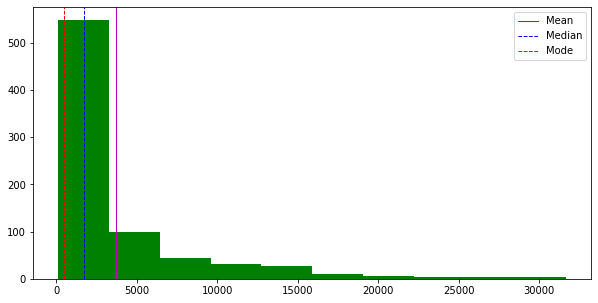

In [24]:
plt.figure(figsize=(10,5)) # makes the plot wider
plt.hist(educ['F.Undergrad'], color='g') # plots a simple histogram
plt.axvline(educ['F.Undergrad'].mean(), color='m', linewidth=1,label='Mean')
plt.axvline(educ['F.Undergrad'].median(), color='b', linestyle='dashed', linewidth=1,label='Median')
plt.axvline(educ['F.Undergrad'].mode()[0], color='r', linestyle='dashed', linewidth=1,label='Mode')
plt.legend()

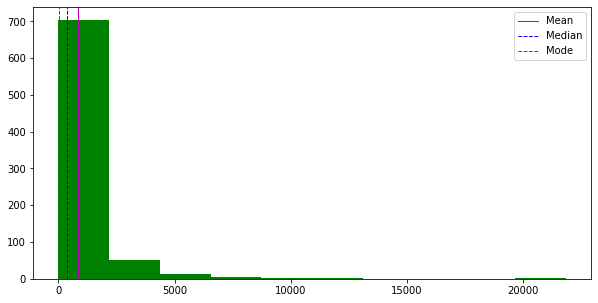

In [25]:
plt.figure(figsize=(10,5)) # makes the plot wider
plt.hist(educ['P.Undergrad'], color='g') # plots a simple histogram
plt.axvline(educ['P.Undergrad'].mean(), color='m', linewidth=1,label='Mean')
plt.axvline(educ['P.Undergrad'].median(), color='b', linestyle='dashed', linewidth=1,label='Median')
plt.axvline(educ['P.Undergrad'].mode()[0], color='r', linestyle='dashed', linewidth=1,label='Mode')
plt.legend()

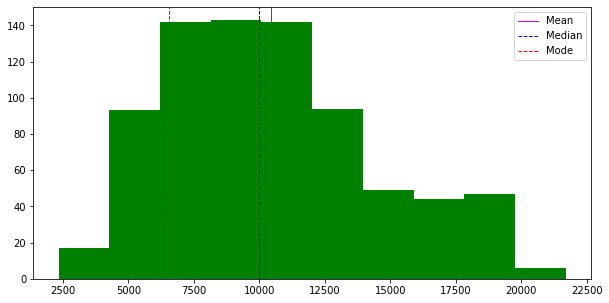

In [26]:
plt.figure(figsize=(10,5)) # makes the plot wider
plt.hist(educ['Outstate'], color='g') # plots a simple histogram
plt.axvline(educ['Outstate'].mean(), color='m', linewidth=1,label='Mean')
plt.axvline(educ['Outstate'].median(), color='b', linestyle='dashed', linewidth=1,label='Median')
plt.axvline(educ['Outstate'].mode()[0], color='r', linestyle='dashed', linewidth=1,label='Mode')
plt.legend()

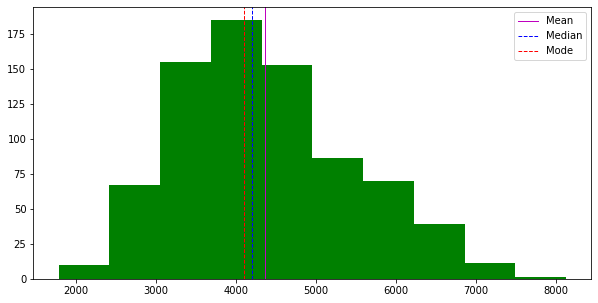

In [27]:
plt.figure(figsize=(10,5)) # makes the plot wider
plt.hist(educ['Room.Board'], color='g') # plots a simple histogram
plt.axvline(educ['Room.Board'].mean(), color='m', linewidth=1,label='Mean')
plt.axvline(educ['Room.Board'].median(), color='b', linestyle='dashed', linewidth=1,label='Median')
plt.axvline(educ['Room.Board'].mode()[0], color='r', linestyle='dashed', linewidth=1,label='Mode')
plt.legend()

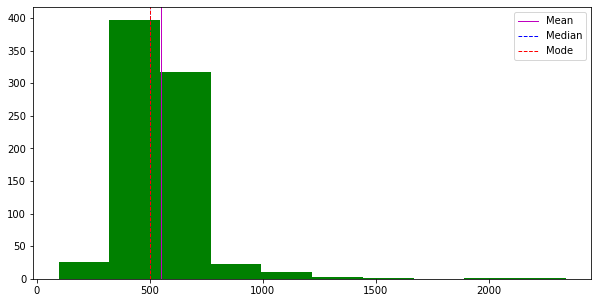

In [28]:
plt.figure(figsize=(10,5)) # makes the plot wider
plt.hist(educ['Books'], color='g') # plots a simple histogram
plt.axvline(educ['Books'].mean(), color='m', linewidth=1,label='Mean')
plt.axvline(educ['Books'].median(), color='b', linestyle='dashed', linewidth=1,label='Median')
plt.axvline(educ['Books'].mode()[0], color='r', linestyle='dashed', linewidth=1,label='Mode')
plt.legend()

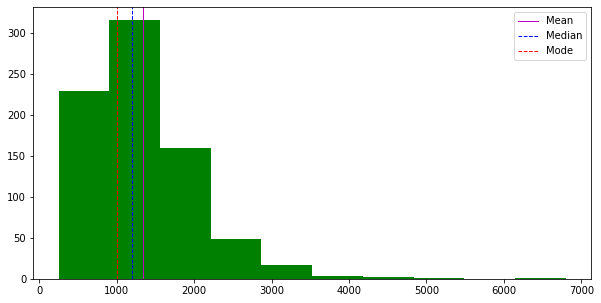

In [29]:
plt.figure(figsize=(10,5)) # makes the plot wider
plt.hist(educ['Personal'], color='g') # plots a simple histogram
plt.axvline(educ['Personal'].mean(), color='m', linewidth=1,label='Mean')
plt.axvline(educ['Personal'].median(), color='b', linestyle='dashed', linewidth=1,label='Median')
plt.axvline(educ['Personal'].mode()[0], color='r', linestyle='dashed', linewidth=1,label='Mode')
plt.legend()

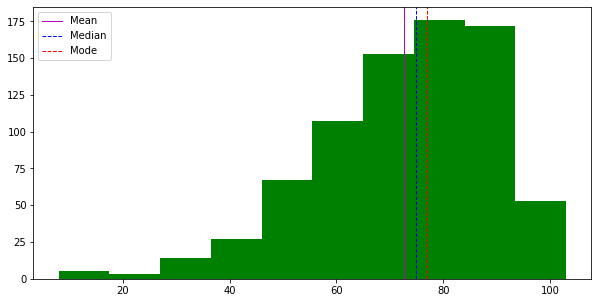

In [30]:
plt.figure(figsize=(10,5)) # makes the plot wider
plt.hist(educ['PhD'], color='g') # plots a simple histogram
plt.axvline(educ['PhD'].mean(), color='m', linewidth=1,label='Mean')
plt.axvline(educ['PhD'].median(), color='b', linestyle='dashed', linewidth=1,label='Median')
plt.axvline(educ['PhD'].mode()[0], color='r', linestyle='dashed', linewidth=1,label='Mode')
plt.legend()

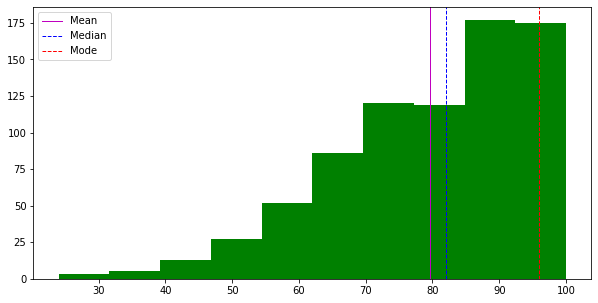

In [31]:
plt.figure(figsize=(10,5)) # makes the plot wider
plt.hist(educ['Terminal'], color='g') # plots a simple histogram
plt.axvline(educ['Terminal'].mean(), color='m', linewidth=1, label='Mean')
plt.axvline(educ['Terminal'].median(), color='b', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(educ['Terminal'].mode()[0], color='r', linestyle='dashed', linewidth=1, label='Mode')
plt.legend()

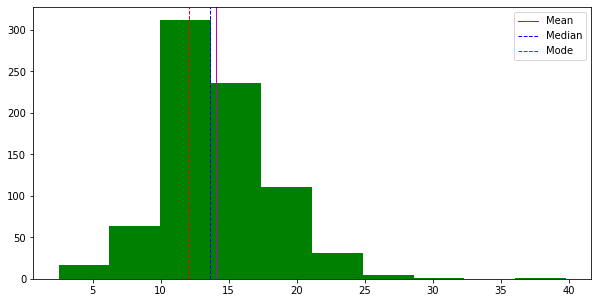

In [32]:
plt.figure(figsize=(10,5)) # makes the plot wider
plt.hist(educ['S.F.Ratio'], color='g') # plots a simple histogram
plt.axvline(educ['S.F.Ratio'].mean(), color='m', linewidth=1,label='Mean')
plt.axvline(educ['S.F.Ratio'].median(), color='b', linestyle='dashed', linewidth=1,label='Median')
plt.axvline(educ['S.F.Ratio'].mode()[0], color='r', linestyle='dashed', linewidth=1,label='Mode')
plt.legend()

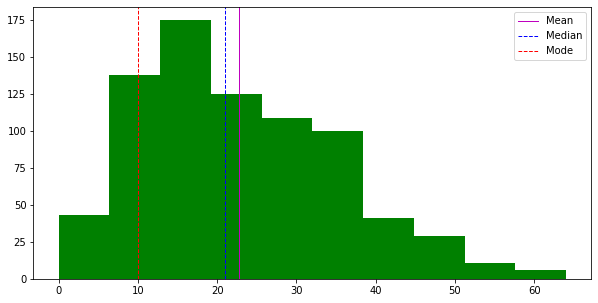

In [33]:
plt.figure(figsize=(10,5)) # makes the plot wider
plt.hist(educ['perc.alumni'], color='g') # plots a simple histogram
plt.axvline(educ['perc.alumni'].mean(), color='m', linewidth=1,label='Mean')
plt.axvline(educ['perc.alumni'].median(), color='b', linestyle='dashed', linewidth=1,label='Median')
plt.axvline(educ['perc.alumni'].mode()[0], color='r', linestyle='dashed', linewidth=1,label='Mode')
plt.legend()

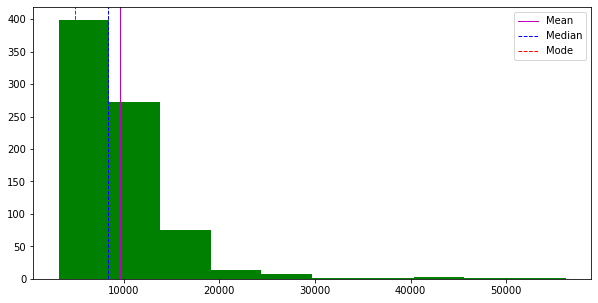

In [34]:
plt.figure(figsize=(10,5)) # makes the plot wider
plt.hist(educ['Expend'], color='g') # plots a simple histogram
plt.axvline(educ['Expend'].mean(), color='m', linewidth=1,label='Mean')
plt.axvline(educ['Expend'].median(), color='b', linestyle='dashed', linewidth=1,label='Median')
plt.axvline(educ['Expend'].mode()[0], color='r', linestyle='dashed', linewidth=1,label='Mode')
plt.legend()

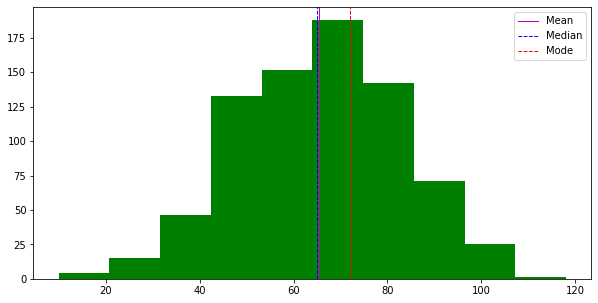

In [35]:
plt.figure(figsize=(10,5)) # makes the plot wider
plt.hist(educ['Grad.Rate'], color='g') # plots a simple histogram
plt.axvline(educ['Grad.Rate'].mean(), color='m', linewidth=1,label='Mean')
plt.axvline(educ['Grad.Rate'].median(), color='b', linestyle='dashed', linewidth=1,label='Median')
plt.axvline(educ['Grad.Rate'].mode()[0], color='r', linestyle='dashed', linewidth=1,label='Mode')
plt.legend()

#### Violin Plot (Only for Reference Purpose)

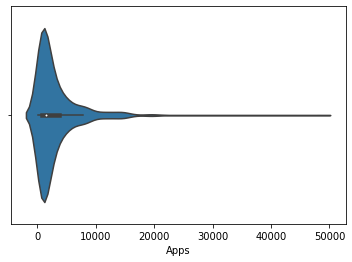

In [36]:
sns.violinplot(educ['Apps'])

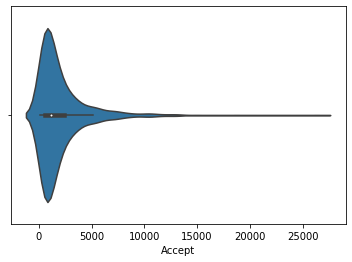

In [37]:
sns.violinplot(educ['Accept'])

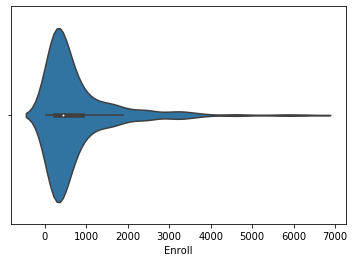

In [38]:
sns.violinplot(educ['Enroll'])

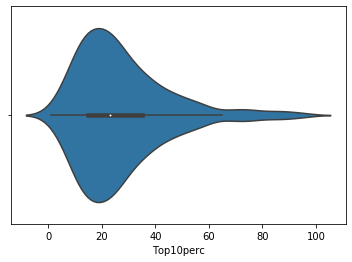

In [39]:
sns.violinplot(educ['Top10perc'])

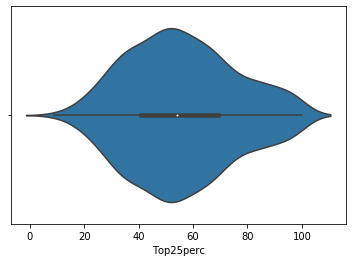

In [40]:
sns.violinplot(educ['Top25perc'])

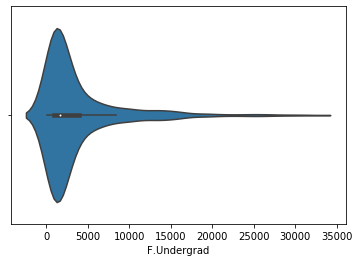

In [41]:
sns.violinplot(educ['F.Undergrad'])

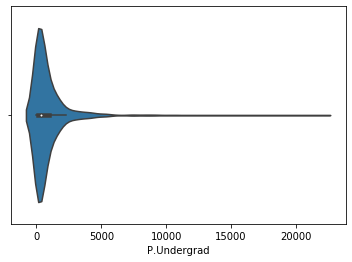

In [42]:
sns.violinplot(educ['P.Undergrad'])

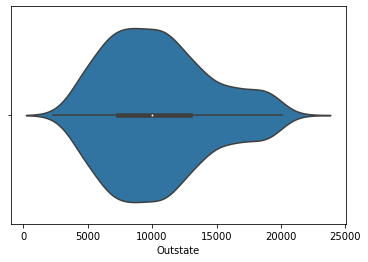

In [43]:
sns.violinplot(educ['Outstate'])

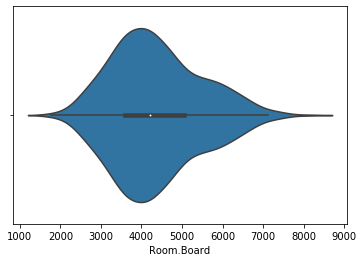

In [44]:
sns.violinplot(educ['Room.Board'])

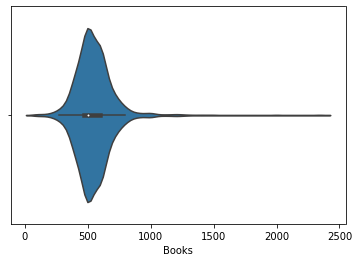

In [45]:
sns.violinplot(educ['Books'])

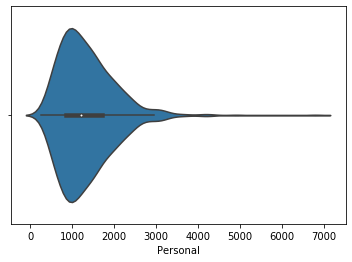

In [46]:
sns.violinplot(educ['Personal'])

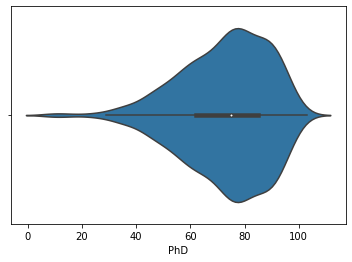

In [47]:
sns.violinplot(educ['PhD'])

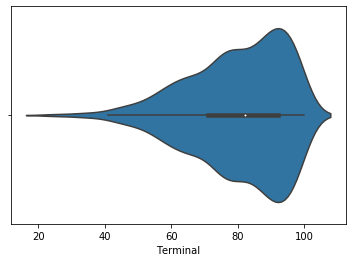

In [48]:
sns.violinplot(educ['Terminal'])

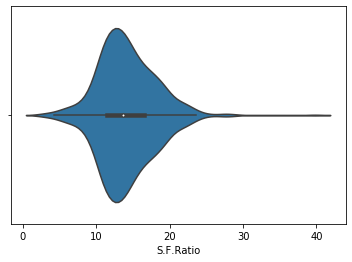

In [49]:
sns.violinplot(educ['S.F.Ratio'])

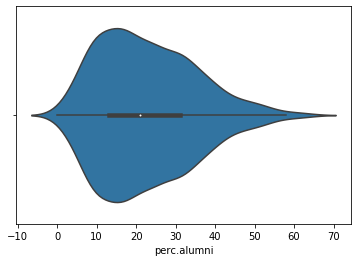

In [50]:
sns.violinplot(educ['perc.alumni'])

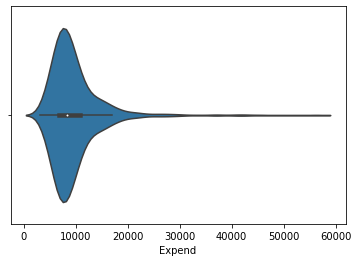

In [51]:
sns.violinplot(educ['Expend'])

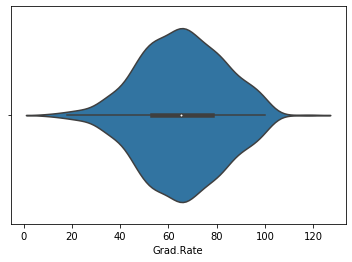

In [52]:
sns.violinplot(educ['Grad.Rate'])

#### For Bivariate Analysis- We can see Correlation & Covariance

In [53]:
educ_1.cov()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.497846e+07,8.949860e+06,3.045256e+06,23132.773138,26952.663479,1.528970e+07,2.346620e+06,7.809704e+05,7.000729e+05,84703.752639,4.683468e+05,24689.433666,21053.067602,1465.060576,-4327.122381,5.246171e+06,9756.421641
Accept,8.949860e+06,6.007960e+06,2.076268e+06,8321.124872,12013.404757,1.039358e+07,1.646670e+06,-2.539623e+05,2.443471e+05,45942.807867,3.335566e+05,14238.201489,12182.093828,1709.838189,-4859.487022,1.596272e+06,2834.162918
Enroll,3.045256e+06,2.076268e+06,8.633684e+05,2971.583415,4172.592435,4.347530e+06,7.257907e+05,-5.811885e+05,-4.099706e+04,17291.199742,1.767380e+05,5028.961166,4217.086027,872.684773,-2081.693787,3.113454e+05,-356.587977
Top10perc,2.313277e+04,8.321125e+03,2.971583e+03,311.182456,311.630480,1.208911e+04,-2.829475e+03,3.990718e+04,7.186706e+03,346.177405,-1.114551e+03,153.184870,127.551581,-26.874525,99.567208,6.087931e+04,149.992164
Top25perc,2.695266e+04,1.201340e+04,4.172592e+03,311.630480,392.229216,1.915895e+04,-1.615412e+03,3.899243e+04,7.199904e+03,377.759266,-1.083605e+03,176.518449,153.002612,-23.097199,102.550946,5.454648e+04,162.371398
F.Undergrad,1.528970e+07,1.039358e+07,4.347530e+06,12089.113681,19158.952782,2.352658e+07,4.212910e+06,-4.209843e+06,-3.664582e+05,92535.764728,1.041709e+06,25211.784197,21424.241746,5370.208581,-13791.929691,4.724040e+05,-6563.307527
P.Undergrad,2.346620e+06,1.646670e+06,7.257907e+05,-2829.474981,-1615.412144,4.212910e+06,2.317799e+06,-1.552704e+06,-1.023919e+05,20410.446674,3.297324e+05,3706.756219,3180.596615,1401.302563,-5297.337090,-6.643512e+05,-6721.062488
Outstate,7.809704e+05,-2.539623e+05,-5.811885e+05,39907.179832,38992.427500,-4.209843e+06,-1.552704e+06,1.618466e+07,2.886597e+06,25808.242145,-8.146737e+05,25157.515051,24164.147673,-8835.253539,28229.553066,1.413324e+07,39479.681796
Room.Board,7.000729e+05,2.443471e+05,-4.099706e+04,7186.705605,7199.903568,-3.664582e+05,-1.023919e+05,2.886597e+06,1.202743e+06,23170.313390,-1.480838e+05,5895.034749,6047.299735,-1574.205914,3701.431379,2.873308e+06,8005.360183
Books,8.470375e+04,4.594281e+04,1.729120e+04,346.177405,377.759266,9.253576e+04,2.041045e+04,2.580824e+04,2.317031e+04,27259.779946,2.004303e+04,72.534242,242.963918,-20.867207,-82.263132,9.691258e+04,3.008837


In [54]:
educ_1.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


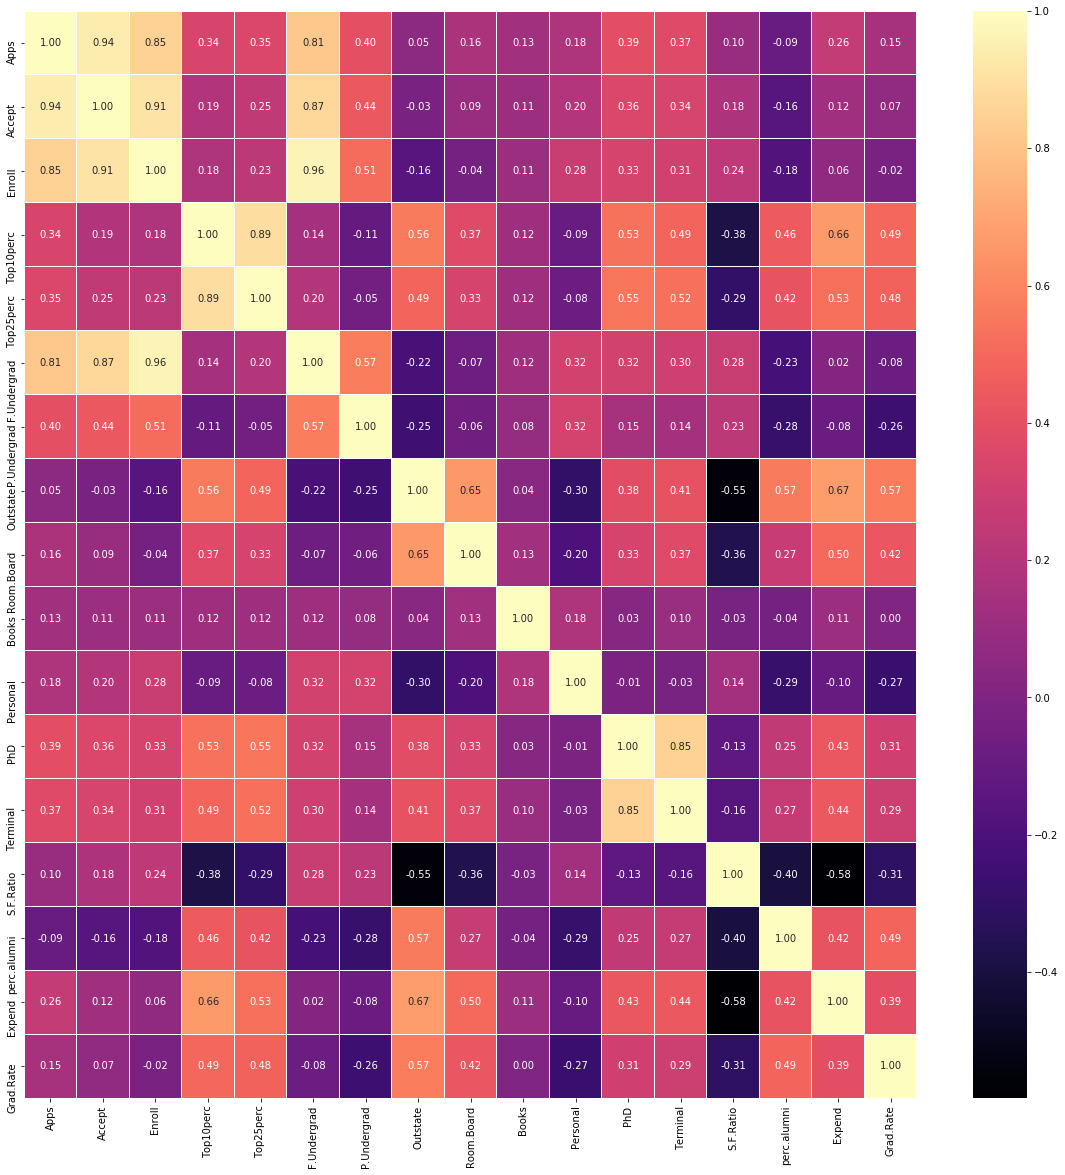

In [55]:
fig,ax = plt.subplots(figsize=(20, 20))   
sns.heatmap(educ_1.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> 2.2 Scale the variables and write the inference for using the type of scaling function for this case study. 

In [56]:
from scipy.stats import zscore
educ_1_z=educ_1.apply(zscore)
educ_1_z.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


#### Standard scaler is the most commonly used scaling technique. It generally assumes that the given data is distributed normally and will scale them such that the distribution is now centred around (or mean) 0 and standard deviation of 1. 
#### In other words, it removes mean and scales the given data to unit variance. According to an article, "it is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data...".**
#### Hence for this dataset, we would proceed with the Standard Scaler.
** [https://oprea.rocks/blog/why-use-sklearn-preprocessing-standardscaler/]


### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> 2.3 Comment on the comparison between covariance and the correlation matrix.

•	The normalized form of covariance is correlation. 

•	Both correlation and covariance measure the linear relationship between variables.

•	Correlation gives the direction as well the strength whereas covariance only tells us about the direction of the two variables under consideration.

•	To measure the relationship between two variables, correlation is preferred over covariance as correlation is unaffected by the change in location and scale.

•	Since correlation is the normalized version of covariance, the diagonals of the correlation matrices is always 1.

•	Also,
Cov(x,y) = Cov(y,x)    &    Cor(x,y) = Cor(y,x)

•	After scaling, the covariance and correlation matrix becomes exactly identical.


### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> 2.4 Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.

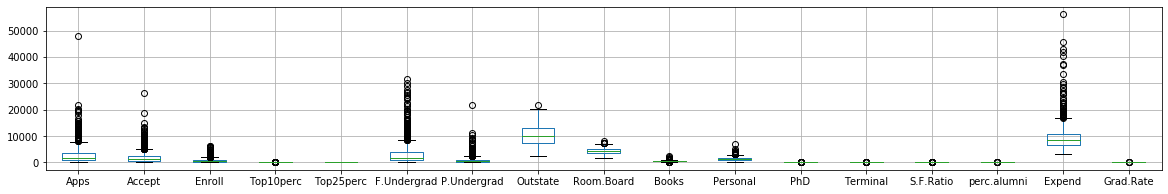

In [57]:
#Checking for outliers 'Before Scaling'
educ_1.boxplot(figsize=(20,3))

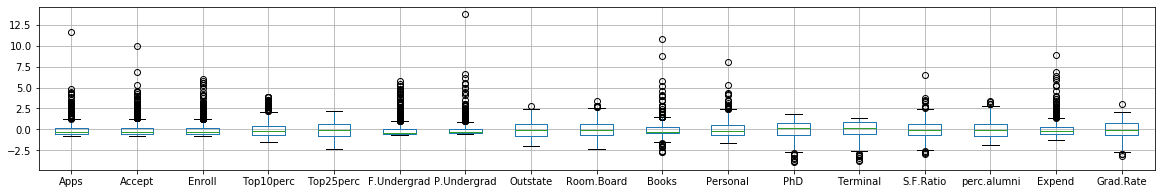

In [58]:
educ_1_z.boxplot(figsize=(20,3))

#### Prior scaling of this data, the data looked extremely skewed and outliers are extremely spread through the data. On the other hand, after scaling we observe that the data became much more compact in the sense that it is now varying from -1 to +1 and obviously the spread of the outliers are also under a certain range.

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> 2.5 Build the covariance matrix, eigenvalues, and eigenvector.

In [59]:
cov_matrix_z = np.cov(educ_1_z.T)
print('Covariance Matrix \n%s', cov_matrix_z)

Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

In [60]:
#NOTE: THIS IS FOR COMPARISON PURPOSE
educ_1_z.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


In [61]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix_z)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.48765602e-01  3.31598227e-01  6.30921033e-02 -2.81310530e-01
   5.74140964e-03  1.62374420e-02  4.24863486e-02  1.03090398e-01
   9.02270802e-02 -5.25098025e-02  3.58970400e-01 -4.59139498e-01
   4.30462074e-02 -1.33405806e-01  8.06328039e-02 -5.95830975e-01
   2.40709086e-02]
 [-2.07601502e-01  3.72116750e-01  1.01249056e-01 -2.67817346e-01
   5.57860920e-02 -7.53468452e-03  1.29497196e-02  5.62709623e-02
   1.77864814e-01 -4.11400844e-02 -5.43427250e-01  5.18568789e-01
  -5.84055850e-02  1.45497511e-01  3.34674281e-02 -2.92642398e-01
  -1.45102446e-01]
 [-1.76303592e-01  4.03724252e-01  8.29855709e-02 -1.61826771e-01
  -5.56936353e-02  4.25579803e-02  2.76928937e-02 -5.86623552e-02
   1.28560713e-01 -3.44879147e-02  6.09651110e-01  4.04318439e-01
  -6.93988831e-02 -2.95896092e-02 -8.56967180e-02  4.44638207e-01
   1.11431545e-02]
 [-3.54273947e-01 -8.24118211e-02 -3.50555339e-02  5.15472524e-02
  -3.95434345e-01  5.26927980e-02  1.61332069e-01  1.22678028e-01
 

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> 2.6 Write the explicit form of the first PC (in terms of Eigen Vectors).

#####  PC1 = (0.248766 * Apps) + (0.2076015 * Accept) + (0.176304 * Enroll) + (0.354274 * Top10perc) + (0.344001 * Top25perc) +                       (0.154641 * F.Undergrad) + (0.026443 * P.Undergrad) + (0.294736 * Outstate)  + (0.24903 * Room.Board) + (0.064758 * Books) + (-0.04253 * Personal) + (0.318313 * PhD) + (0.317056 * Terminal) + (-0.17696 * S.F.Ratio) + (0.205082 * perc.alumni) + (0.318909 * Expend) + (0.252316 * Grad.Rate)

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> 2.7 Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate? Perform PCA and export the data of the Principal Component scores into a data frame.

In [62]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 32.0206282   58.36084263  65.26175919  71.18474841  76.67315352
  81.65785448  85.21672597  88.67034731  91.78758099  94.16277251
  96.00419883  97.30024023  98.28599436  99.13183669  99.64896227
  99.86471628 100.        ]


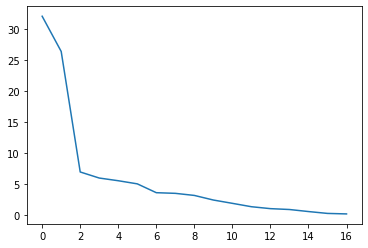

In [63]:
plt.plot(var_exp)

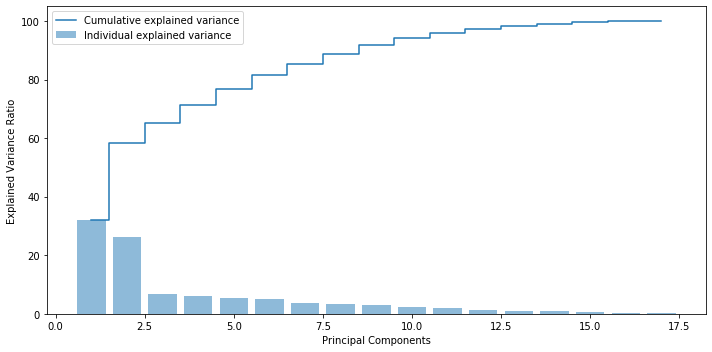

In [64]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

•	The Cumulative Variance Explained (%) shows that with an increasing number of principal components or factors, the cumulative variance asymptotically approaches 100%. This gives the percentage of variance accounted for by the first n components. 
Note:
The cumulative percentage for the second component is the sum of the percentage    of variance for the first and second components.

•	Three common method for Component selection:
i.	Based on Eigenvalue: Here we choose the components with eigenvalues higher than 1. 
ii.	Cumulative Variance Explained: Here, the chosen factors should explain 70 to 80% of variance at least. 
iii.	Scree plot: This is a graphical method in which we choose the factors until a break in the elbow.
Hence according to the cumulative variance explained criteria, we in this case choose the 6th component which explains 81.66% of the variance.

•	The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the “core” of a PCA. The eigenvectors (principal components) helps in used to determine the directions of the new feature space. On the other hand, eigenvalues determine their magnitude. 

Note:
Also we can say that eigenvalues explain the variance of the data along the new feature axes.

• The scree plot is used to determine the optimal number of components. This is a graphical method in which we choose the factors until a break in the elbow. (as discussed above)
The point where the slope of the curve is clearly levelling off ( also known as ‘elbow’) indicates the optimum number of principal components. In this case, it is ‘6’ principal components.

• The Explained Variance Ratio V. Principal Component plot above clearly shows that most of the variance (81.66% of the variance to be precise) can be explained by the first ‘six’ principal components. 

In [65]:
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
data_reduced=pca.fit_transform(educ_1_z)
data_reduced

array([[-1.59285540e+00,  7.67333510e-01, -1.01073552e-01,
        -9.21749384e-01, -7.43975356e-01, -2.98306112e-01],
       [-2.19240180e+00, -5.78829984e-01,  2.27879814e+00,
         3.58891820e+00,  1.05999652e+00, -1.77137249e-01],
       [-1.43096371e+00, -1.09281889e+00, -4.38092812e-01,
         6.77240528e-01, -3.69613273e-01, -9.60591690e-01],
       ...,
       [-7.32560596e-01, -7.72352397e-02, -4.05624856e-04,
         5.43162643e-02, -5.16021167e-01,  4.68014284e-01],
       [ 7.91932735e+00, -2.06832886e+00,  2.07356363e+00,
         8.52054049e-01, -9.47754588e-01, -2.06993750e+00],
       [-4.69508066e-01,  3.66660943e-01, -1.32891515e+00,
        -1.08022558e-01, -1.13217594e+00,  8.39893089e-01]])

In [66]:
pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.0630921 , -0.10124905, -0.08298557,  0.03505553, -0.02414794,
        -0.06139298,  0.13968172,  0.04659887,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674399, -0.20806465],
       [ 0.28131053,  0.26781734,  0.16182677, -0.05154725, -0.10976654,
         0.10041233, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.07927349

In [67]:
educ_comp = pd.DataFrame(pca.components_,columns=list(educ_1_z))
print(educ_comp)

       Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.248766  0.207602  0.176304   0.354274   0.344001     0.154641   
1  0.331598  0.372117  0.403724  -0.082412  -0.044779     0.417674   
2 -0.063092 -0.101249 -0.082986   0.035056  -0.024148    -0.061393   
3  0.281311  0.267817  0.161827  -0.051547  -0.109767     0.100412   
4  0.005741  0.055786 -0.055694  -0.395434  -0.426534    -0.043454   
5 -0.016237  0.007535 -0.042558  -0.052693   0.033092    -0.043454   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.026443  0.294736    0.249030  0.064758 -0.042529  0.318313  0.317056   
1     0.315088 -0.249644   -0.137809  0.056342  0.219929  0.058311  0.046429   
2     0.139682  0.046599    0.148967  0.677412  0.499721 -0.127028 -0.066038   
3    -0.158558  0.131291    0.184996  0.087089 -0.230711 -0.534725 -0.519443   
4     0.302385  0.222532    0.560919 -0.127289 -0.222311  0.140166  0.204720   
5    -0.191199 -0.030000    0

In [68]:
educ_new = pd.DataFrame(data_reduced)
educ_new.columns = educ_new.columns+1
educ_new.index = educ_new.index+1 
educ_new

,1,2,3,4,5,6
1,-1.592855,0.767334,-0.101074,-0.921749,-0.743975,-0.298306
2,-2.192402,-0.578830,2.278798,3.588918,1.059997,-0.177137
3,-1.430964,-1.092819,-0.438093,0.677241,-0.369613,-0.960592
4,2.855557,-2.630612,0.141722,-1.295486,-0.183837,-1.059508
5,-2.212008,0.021631,2.387030,-1.114538,0.684451,0.004918
...,...,...,...,...,...,...
773,-3.328458,1.220255,-0.383388,0.108555,0.776996,0.309429
774,0.199389,-0.686689,0.051564,0.562269,0.375191,0.373343
775,-0.732561,-0.077235,-0.000406,0.054316,-0.516021,0.468014
776,7.919327,-2.068329,2.073564,0.852054,-0.947755,-2.069937


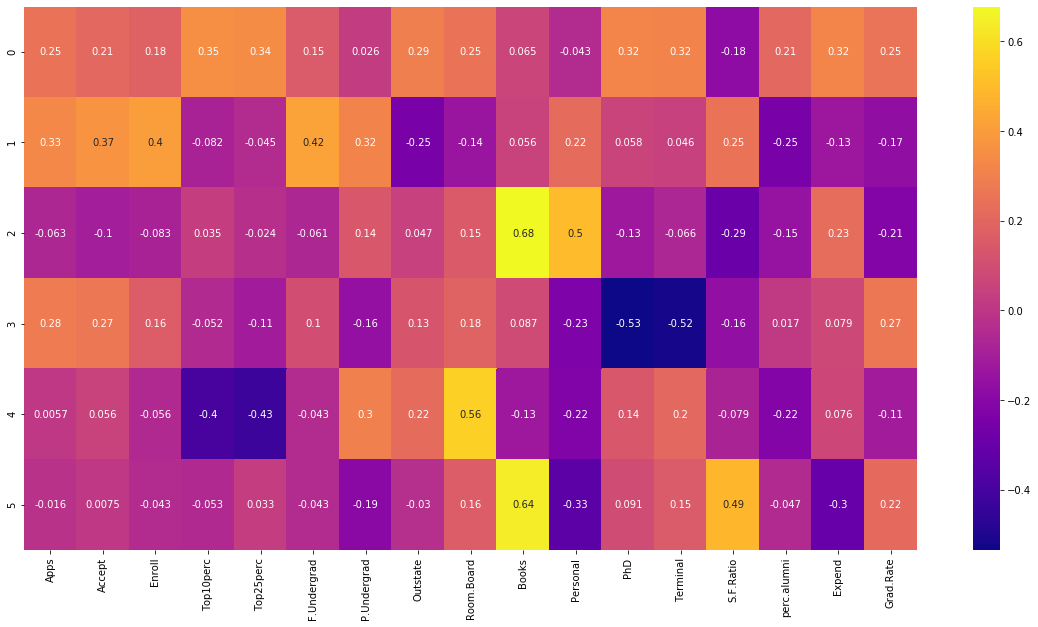

In [69]:
plt.figure(figsize=(20,10))
sns.heatmap(educ_comp,annot=True,cmap='plasma',)

In [70]:
educ_comp.to_csv('pca_2-7_a.csv',index=False,header=True)
# exporting the data of the Principal Component scores into a data frame.

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> 2.8 Mention the business implication of using the Principal Component Analysis for this case study. [Hint: Write Interpretations of the Principal Components Obtained]


•	Principal component analysis (PCA) is an efficient solution when we deal with highly correlated variables. These correlated variables are reduced to fewer number of principal component. 

•	PCA's main objective is to reduce a large set of variables to a smaller set that still retains the originality of the data. In other words, increasing interpretability and minimizing the loss of information. 

•	PCA is a technique used to emphasize variation and bring out strong patterns in a dataset. It is often used to make data easy to explore and visualize.

Many businesses prefer to reduce the number of variables as they can save money and/or time by removing redundant predictors. Redundant in the sense that those variables might/might not be important but is covered by other important variable of the dataset, which leads us to eliminating those variables and minimize the information loss and reduce or eradicate the problem of multicollinearity.
